In [13]:
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("http://digo.ee/data.csv", delimiter=";")
#print (data.shape)
data = np.reshape(data[1], (28, 28))
plt.imshow(data, cmap='Greys')
plt.show()

KeyError: 1

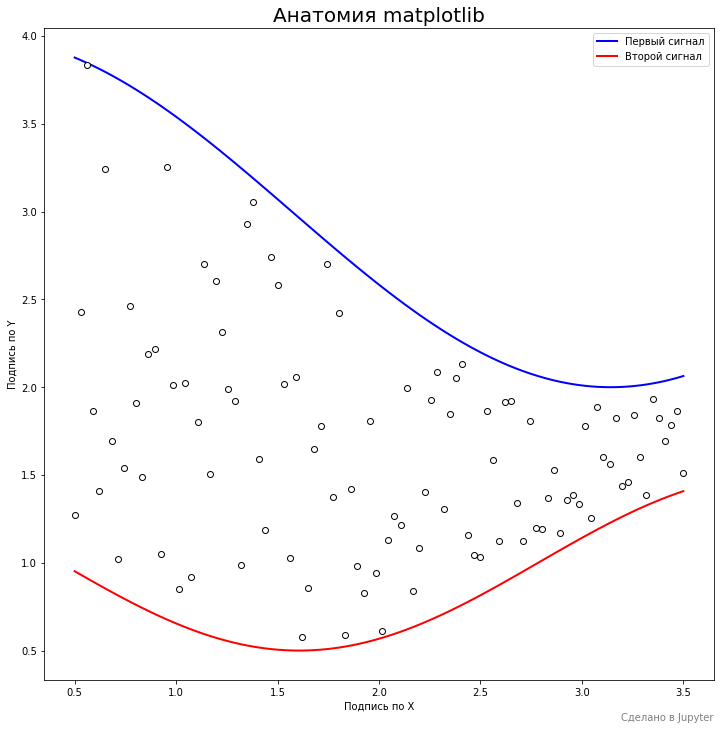

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X, Y1, c="blue", lw=2, label="Первый сигнал")
ax.plot(X, Y2, c="red", lw=2, label="Второй сигнал")
ax.plot(X, Y3, c="black", lw=0, marker='o', markerfacecolor="white")
ax.set_title("Анатомия matplotlib", fontsize=20)
ax.set_xlabel("Подпись по Х")
ax.set_ylabel("Подпись по Y")
ax.legend()
ax.text(3.65, 0.1, "Сделано в Jupyter", fontsize=10, ha="right", color='0.5')
plt.show()

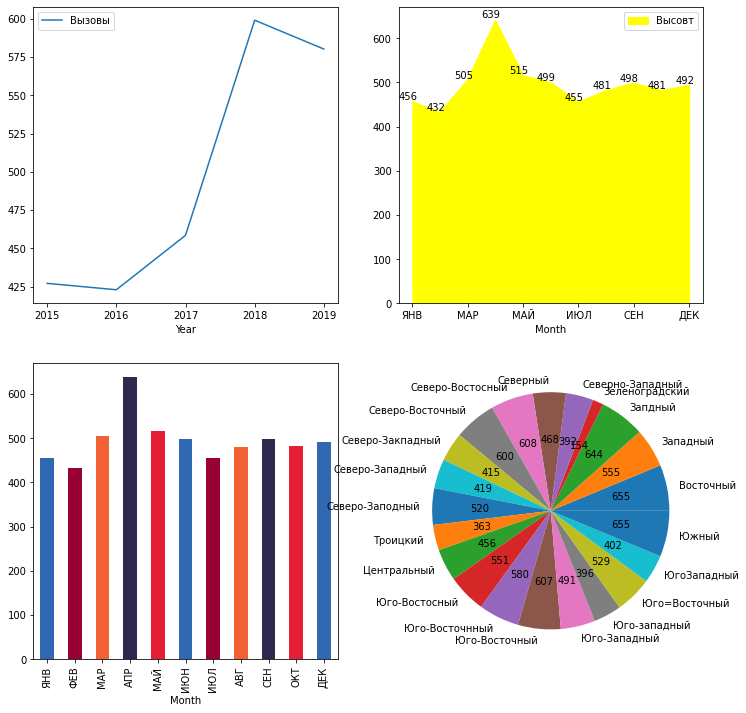

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("http://digo.ee/data.csv", delimiter=";")
data["Month"] = data["Month"].str.slice(0,3).str.upper()
data["AdmArea"] = data["AdmArea"].apply(lambda x: x.split(" ")[0])
years = data.groupby("Year").mean()["Calls"]
fig = plt.figure(figsize=(12, 12))
area = fig.add_subplot(2, 2, 1)
years.plot.line(ax=area, label="Вызовы")
area.legend()
plt.xticks(years.index)
# second graph
area = fig.add_subplot(2, 2, 2)
monthes = data.groupby("Month").mean()["Calls"]
monthes = monthes.reindex(["ЯНВ", "ФЕВ", "МАР", "АПР", "МАЙ", "ИЮН", "ИЮЛ", "АВГ", "СЕН", "ОКТ", "ДЕК"])
monthes.plot.area(ax=area, label="Высовт", color="yellow")
area.legend()
j = 0 
for i in monthes:
    area.annotate(round(i), xy=(j-0.5,i*1.01))
    j += 1
    
area = fig.add_subplot(2, 2, 3)
# coolors.co
monthes.plot.bar(ax=area, label="", color=["#3068B2", "#990033", "#F46036", "#2E294E", "#E71D36"])

area = fig.add_subplot(2, 2, 4)
adm = data.groupby("AdmArea").filter(lambda x:x["Calls"].count() > 2)
adm = data.groupby("AdmArea").mean()["Calls"]
total = sum(adm)
adm.plot.pie(ax=area, label="", autopct=lambda x: int(total * x/100))
plt.show()

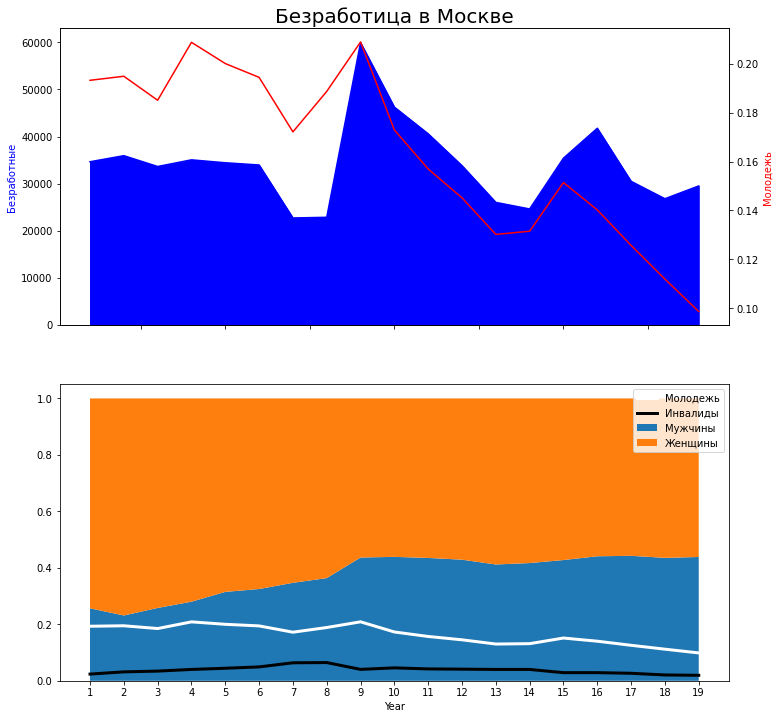

In [43]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("http://digo.ee/data-9753.utf.csv", delimiter=";")

data = data.dropna(axis=1)
data["Year"] = data["Year"]%100
years = data.groupby("Year").mean()
years["UnemployedMen"] = years["UnemployedMen"] / years["UnemployedTotal"]
years["UnemployedWomen"] = years["UnemployedWomen"] / years["UnemployedTotal"]
years["UnemployedYoung"] = years["UnemployedYoung"] / years["UnemployedTotal"]
years["UnemployedDisabled"] = years["UnemployedDisabled"] / years["UnemployedTotal"]

fig = plt.figure(figsize=(12, 12))
area = fig.add_subplot(2, 1, 1)
area.set_title("Безработица в Москве", fontsize=20)
years["UnemployedTotal"].plot.area(ax=area, color="blue")
area.set_ylabel("Безработные", color="blue")
area2 = area.twinx()
years["UnemployedYoung"].plot.line(ax=area2, color="red")
area2.set_ylabel("Молодежь", color="red")

area = fig.add_subplot(2, 1, 2)
years["UnemployedYoung"].plot.line(ax=area, color="white", lw=3)
years["UnemployedDisabled"].plot.line(ax=area, color="black", lw=3)
area.stackplot(years.index, [years["UnemployedMen"], years["UnemployedWomen"]])
area.legend(["Молодежь", "Инвалиды", "Мужчины", "Женщины"])
plt.xticks(years.index)
plt.show()

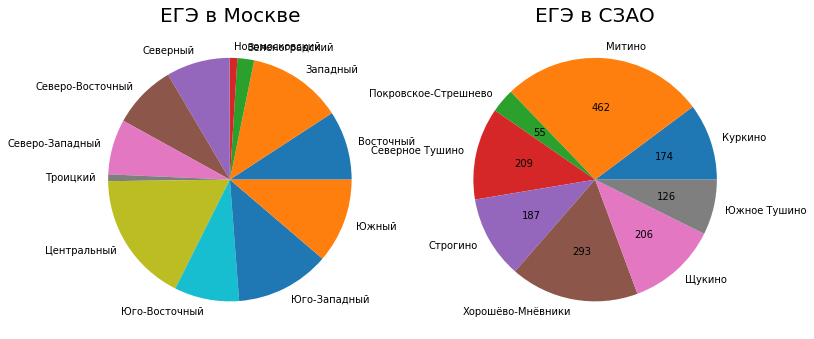

In [51]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("http://digo.ee/data-9722.utf.csv", delimiter=";")
data["District"] = data["District"].str.replace("район ", "").astype("category")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0]).astype("category")
data = data.set_index("YEAR").loc["2018-2019"].reset_index()

fig = plt.figure(figsize=(12, 12))
area = fig.add_subplot(1, 2, 1)
area.set_title("ЕГЭ в Москве", fontsize=20)
data_adm = data.set_index("AdmArea")
data_adm["PASSES_OVER_220"].groupby("AdmArea").sum().plot.pie(ax=area, label="")

area = fig.add_subplot(1, 2, 2)
area.set_title("ЕГЭ в СЗАО", fontsize=20)
data_district = data_adm.loc["Северо-Западный"].reset_index().set_index("District")
data_district = data_district["PASSES_OVER_220"].groupby("District").sum()
total = sum(data_district)
data_district.plot.pie(ax=area, label="", autopct=lambda x:int(total * x/100))
plt.show()


#print (data.head())

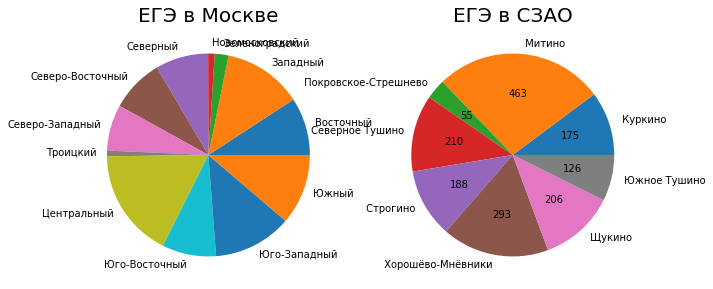

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("http://digo.ee/data-9722.utf.csv", delimiter=";")

data['District'] = data['District'].str.replace('район', '').astype('category')
data['AdmArea'] = data['AdmArea'].apply(lambda x: x.split()[0]).astype('category')

data = data.set_index('YEAR').loc['2018-2019'].reset_index()

fig = plt.figure(figsize=(10, 10))
area = fig.add_subplot(1, 2 , 1)
area.set_title('ЕГЭ в Москве', fontsize=20)
data_adm = data.set_index('AdmArea')
data_adm['PASSES_OVER_220'].groupby('AdmArea').sum().plot.pie(ax=area, label='')

area = fig.add_subplot(1, 2, 2)
area.set_title('ЕГЭ в СЗАО', fontsize=20)
data_district = data_adm.loc['Северо-Западный'].reset_index().set_index('District')
data_district = data_district['PASSES_OVER_220'].groupby('District').sum()

total = sum(data_district)

data_district.plot.pie(ax=area, label="", autopct=lambda x:int(round(total * x/100)))

plt.show()